In [ ]:
import geopandas as gpd
import numpy as np
import pandas as pd

In [ ]:
# Install folium and mapclassify so the explore method of a GeoDataFrame can work properly.
! pip install folium
! pip install mapclassify

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load Geospatial Data for Census Tracts

In [ ]:
# Download the shapefile of New York State census tracts from the following website:
# https://www.census.gov/cgi-bin/geo/shapefiles/index.php?year=2020&layergroup=Census+Tracts
# The default file name is tl_2020_48_tract.zip
# This file needs to be manually uploaded to this Colab environment.

In [ ]:
zip_file_path = '/content/drive/MyDrive/tl_2020_48_tract.zip'
census_tracts = gpd.read_file( 'zip://' + zip_file_path)
print(census_tracts.shape)
census_tracts.head()

(6896, 13)


,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,48,189,950200,48189950200,9502,Census Tract 9502,G5020,S,6306913,0,+34.2117433,-101.7172438,"POLYGON ((-101.73553 34.21051, -101.73553 34.2..."
1,48,219,950400,48219950400,9504,Census Tract 9504,G5020,S,12691656,5302,+33.5889072,-102.3953070,"POLYGON ((-102.41616 33.56994, -102.41616 33.5..."
2,48,219,950300,48219950300,9503,Census Tract 9503,G5020,S,12186639,0,+33.5869355,-102.3416971,"POLYGON ((-102.36763 33.58398, -102.36763 33.5..."
3,48,219,950100,48219950100,9501,Census Tract 9501,G5020,S,214157569,0,+33.7715552,-102.1822653,"POLYGON ((-102.28192 33.72410, -102.28190 33.7..."
4,48,219,950600,48219950600,9506,Census Tract 9506,G5020,S,358638163,0,+33.4659916,-102.1861385,"POLYGON ((-102.31826 33.41007, -102.31598 33.4..."


<Axes: >

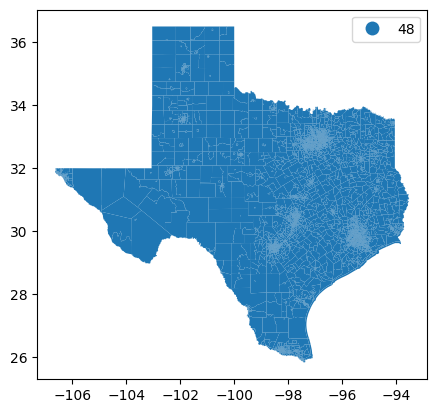

In [ ]:
census_tracts.plot("STATEFP", legend=True)

## Load Precinct-Level Voting Data for the 2020 Presidential Election

In [ ]:
# Download the New York State voting data from this link:
# https://dataverse.harvard.edu/file.xhtml?fileId=5259468&version=40.0#
# Download the shapefile as a ZIP archive.
# The downloaded file is named tx_2020.zip.
# Manually upload the zip file to this colab environment.

In [ ]:
zip_path = '/content/drive/MyDrive/tx_2020.zip'
precincts = gpd.read_file('zip://'+ zip_path)
print(precincts.shape)
precincts.head()

(9014, 38)


,CNTY,COLOR,PREC,PCTKEY,CNTYKEY,G20VR,G20SSVR,G20PRERTRU,G20PREDBID,G20PRELJOR,...,G20SSCRBUS,G20SSCDTRI,G20SSCLOXF,G20SCCRRIC,G20SCCDFRI,G20SCCRYEA,G20SCCDCLI,G20SCCRNEW,G20SCCDBIR,geometry
0,113,7,1104,1131104,57,2745,39.5,221,1173,7,...,195,1157,32,216,1172,214,1169,219,1162,"POLYGON ((1314208.406 1178220.110, 1314211.847..."
1,201,2,0312,2010312,101,3973,11.3,1124,1460,21,...,1190,1290,54,1194,1343,1152,1373,1170,1345,"POLYGON ((1432565.993 851290.217, 1432575.099 ..."
2,351,4,0003,3510003,176,626,1.1,412,28,0,...,387,28,5,390,29,382,32,386,31,"POLYGON ((1602738.373 1008175.555, 1602745.401..."
3,181,4,0304,1810304,91,3058,4.5,1290,676,29,...,1331,597,39,1335,632,1339,617,1347,619,"POLYGON ((1312523.436 1279889.507, 1312544.741..."
4,201,2,0877,2010877,101,5743,27.1,1352,2554,43,...,1316,2466,105,1359,2516,1379,2495,1382,2490,"POLYGON ((1409146.792 864246.161, 1409155.944 ..."


In [ ]:
# Calculate the percentage of votes that goes to Biden.
# Only votes to Biden or Trump are counted.
precincts['Biden_proportion'] = precincts['G20PREDBID'] / (precincts['G20PREDBID'] + precincts['G20PRERTRU'])

In [ ]:
precincts.head()

,CNTY,COLOR,PREC,PCTKEY,CNTYKEY,G20VR,G20SSVR,G20PRERTRU,G20PREDBID,G20PRELJOR,...,G20SSCDTRI,G20SSCLOXF,G20SCCRRIC,G20SCCDFRI,G20SCCRYEA,G20SCCDCLI,G20SCCRNEW,G20SCCDBIR,geometry,Biden_proportion
0,113,7,1104,1131104,57,2745,39.5,221,1173,7,...,1157,32,216,1172,214,1169,219,1162,"POLYGON ((1314208.406 1178220.110, 1314211.847...",0.841463
1,201,2,0312,2010312,101,3973,11.3,1124,1460,21,...,1290,54,1194,1343,1152,1373,1170,1345,"POLYGON ((1432565.993 851290.217, 1432575.099 ...",0.565015
2,351,4,0003,3510003,176,626,1.1,412,28,0,...,28,5,390,29,382,32,386,31,"POLYGON ((1602738.373 1008175.555, 1602745.401...",0.063636
3,181,4,0304,1810304,91,3058,4.5,1290,676,29,...,597,39,1335,632,1339,617,1347,619,"POLYGON ((1312523.436 1279889.507, 1312544.741...",0.343845
4,201,2,0877,2010877,101,5743,27.1,1352,2554,43,...,2466,105,1359,2516,1379,2495,1382,2490,"POLYGON ((1409146.792 864246.161, 1409155.944 ...",0.653866


In [ ]:
# For unknown reason, colab cannot display these voting precincts. Perhaps there are too many precincts?
#precincts.explore("Biden_proportion", legend=False)

## Approximate Census Blocks by Voting Precincts

Here is my approximation strategy:
- For a given census block, find all precincts whose centroid (computed by geopands) is contained by the census block.
- Use these precincts as an approximation to the census block.

In [ ]:
# Align the coordinates of these two geo data frames.
census_tracts.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [ ]:
precincts.crs

<Projected CRS: PROJCS["NAD_1983_Lambert_Conformal_Conic",GEOGCS[" ...>
Name: NAD_1983_Lambert_Conformal_Conic
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
precincts = precincts.to_crs(4269)

**Modify the variable `CENSUS_BLOCK_INDEX` to examine a different block.**

In [ ]:
CENSUS_TRACT_INDEX = 222 # The row index of a census tract  in data frame census_tracts
census_tracts.loc[CENSUS_TRACT_INDEX]

STATEFP                                                    48
COUNTYFP                                                  201
TRACTCE                                                423304
GEOID                                             48201423304
NAME                                                  4233.04
NAMELSAD                                 Census Tract 4233.04
MTFCC                                                   G5020
FUNCSTAT                                                    S
ALAND                                                 1592448
AWATER                                                      0
INTPTLAT                                          +29.6607543
INTPTLON                                         -095.5203499
geometry    POLYGON ((-95.52810199999999 29.664972, -95.52...
Name: 222, dtype: object

Finding Intersecting Precincts and Calculating Their Overlap

In [ ]:
census_tract_polygon = census_tracts.loc[CENSUS_TRACT_INDEX, 'geometry']
overlap_precincts = precincts[precincts['geometry'].intersects(census_tract_polygon)]
overlap_precincts['overlap_percentage'] = None  # Create an empty 'overlap_percentage' column

# Calculate and assign overlap percentages for each row
for idx, precinct_row in overlap_precincts.iterrows():
    precinct_geometry = precinct_row['geometry']

    # Calculate the intersection area
    intersection_area = precinct_geometry.intersection(census_tract_polygon).area

    # Calculate the percentage overlap
    overlap_percentage = (intersection_area / precinct_geometry.area) * 100

    # Assign the calculated overlap_percentage to the corresponding row
    overlap_precincts.at[idx, 'overlap_percentage'] = overlap_percentage

overlap_precincts.head()

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,CNTY,COLOR,PREC,PCTKEY,CNTYKEY,G20VR,G20SSVR,G20PRERTRU,G20PREDBID,G20PRELJOR,...,G20SSCLOXF,G20SCCRRIC,G20SCCDFRI,G20SCCRYEA,G20SCCDCLI,G20SCCRNEW,G20SCCDBIR,geometry,Biden_proportion,overlap_percentage
1453,201,7,0490,2010490,101,2245,15.3,451,1053,15,...,30,455,1004,461,1003,472,978,"POLYGON ((-95.51236 29.66833, -95.51234 29.667...",0.700133,0.000001
5491,201,3,0384,2010384,101,2830,10.6,501,1337,12,...,21,501,1292,486,1303,499,1285,"POLYGON ((-95.50841 29.65527, -95.50841 29.655...",0.727421,0.0
5513,201,4,0525,2010525,101,3412,8.0,519,1727,10,...,37,521,1651,512,1664,528,1652,"POLYGON ((-95.52131 29.65562, -95.52143 29.655...",0.768923,77.856053
5552,201,5,0555,2010555,101,2136,21.7,246,854,5,...,15,212,847,222,842,215,839,"POLYGON ((-95.52817 29.66889, -95.52816 29.668...",0.776364,0.0


In [ ]:
# Filter precincts with overlap_percentage >= 50
filtered_precincts = overlap_precincts[overlap_precincts['overlap_percentage'] >= 50]

# Now, filtered_precincts contains only the precincts with overlap_percentage >= 50
filtered_precincts.head()

,CNTY,COLOR,PREC,PCTKEY,CNTYKEY,G20VR,G20SSVR,G20PRERTRU,G20PREDBID,G20PRELJOR,...,G20SSCLOXF,G20SCCRRIC,G20SCCDFRI,G20SCCRYEA,G20SCCDCLI,G20SCCRNEW,G20SCCDBIR,geometry,Biden_proportion,overlap_percentage
5513,201,4,0525,2010525,101,3412,8.0,519,1727,10,...,37,521,1651,512,1664,528,1652,"POLYGON ((-95.52131 29.65562, -95.52143 29.655...",0.768923,77.856053


In [ ]:
# Visualize this census tract and the precincts that are approximating it.

In [ ]:
census_tracts.loc[[CENSUS_TRACT_INDEX]].explore('STATEFP')

In [ ]:
filtered_precincts.explore('Biden_proportion')

In [ ]:
# Import the library
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:658: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/geopandas/plotting.py:658: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


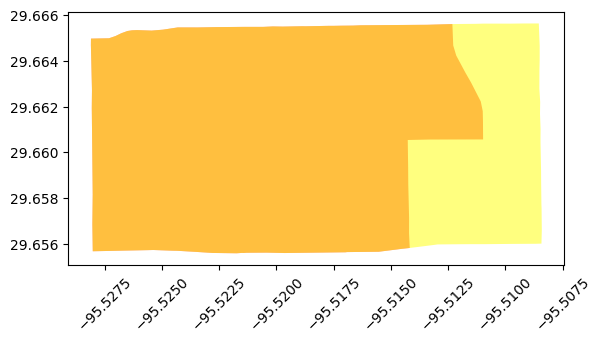

In [ ]:
# Show the approximation error
base = census_tracts.loc[[CENSUS_TRACT_INDEX]].plot('STATEFP', color='red', alpha=0.5)
filtered_precincts.plot('STATEFP', color='yellow', ax=base, alpha=0.5)
# Set aspect ratio to be equal for x and y axes
plt.gca().set_aspect('equal', adjustable='box')

# Rotate x-axis labels
plt.xticks(rotation=45)
plt.show()


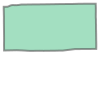

In [ ]:
# Measure the approximation error in area.
approximation = filtered_precincts.unary_union
approximation

In [ ]:
approximation_one_block = gpd.GeoSeries([approximation], crs=4269)
approximation_one_block

0    POLYGON ((-95.52131 29.65562, -95.52143 29.655...
dtype: geometry

In [ ]:
census_tract = census_tracts.loc[[CENSUS_TRACT_INDEX], 'geometry'].reset_index()

In [ ]:
error = approximation_one_block.symmetric_difference(census_tract)

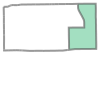

In [ ]:
error.loc[0]

In [ ]:
error.area

<ipython-input-25-a4029d802f14>:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  error.area


0    0.000042
dtype: float64

In [ ]:
relative_error = error.area /census_tract.area
relative_error

<ipython-input-26-4a4c7555a961>:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  relative_error = error.area /census_tract.area


0    0.284422
dtype: float64

In [ ]:
for i in census_tracts.index:
  census_block_polygon = census_tracts.loc[i, 'geometry']
  overlap_precincts = precincts[precincts['geometry'].intersects(census_block_polygon)]
  overlap_precincts['overlap_percentage'] = None
  for idx, precinct_row in overlap_precincts.iterrows():
    precinct_geometry = precinct_row['geometry']

    # Calculate the intersection area
    intersection_area = precinct_geometry.intersection(census_block_polygon).area

    # Calculate the percentage overlap
    overlap_percentage = (intersection_area / precinct_geometry.area) * 100

    # Assign the calculated overlap_percentage to the corresponding row
    overlap_precincts.loc[idx, 'overlap_percentage'] = overlap_percentage
    filtered_precincts = overlap_precincts[overlap_precincts['overlap_percentage'] >= 50]

  # Show the approximation error
  approximation = filtered_precincts.unary_union
  approximation_one_block = gpd.GeoSeries([approximation], crs=4269)
  census_tract = census_tracts.loc[[i], 'geometry'].reset_index()
  error = approximation_one_block.symmetric_difference(census_tract)
  relative_error = error.area /census_tract.area
  census_tracts.loc[i,'relative_error'] = relative_error.iloc[0]

census_tracts

Streaming output truncated to the last 5000 lines.

  relative_error = error.area /census_tract.area
/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
<ipython-input-27-7022638fa03f>:23: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  relative_error = error.area /census_tract.area
/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,relative_error
0,48,189,950200,48189950200,9502,Census Tract 9502,G5020,S,6306913,0,+34.2117433,-101.7172438,"POLYGON ((-101.73553 34.21051, -101.73553 34.2...",0.587847
1,48,219,950400,48219950400,9504,Census Tract 9504,G5020,S,12691656,5302,+33.5889072,-102.3953070,"POLYGON ((-102.41616 33.56994, -102.41616 33.5...",0.942182
2,48,219,950300,48219950300,9503,Census Tract 9503,G5020,S,12186639,0,+33.5869355,-102.3416971,"POLYGON ((-102.36763 33.58398, -102.36763 33.5...",0.654605
3,48,219,950100,48219950100,9501,Census Tract 9501,G5020,S,214157569,0,+33.7715552,-102.1822653,"POLYGON ((-102.28192 33.72410, -102.28190 33.7...",0.283044
4,48,219,950600,48219950600,9506,Census Tract 9506,G5020,S,358638163,0,+33.4659916,-102.1861385,"POLYGON ((-102.31826 33.41007, -102.31598 33.4...",0.208536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6891,48,441,012702,48441012702,127.02,Census Tract 127.02,G5020,S,2881609,49109,+32.3897076,-099.7552360,"POLYGON ((-99.76910 32.38300, -99.76862 32.383...",0.302111
6892,48,441,013502,48441013502,135.02,Census Tract 135.02,G5020,S,313590469,488714,+32.2656084,-099.7400202,"POLYGON ((-99.88473 32.34294, -99.88463 32.343...",0.980687
6893,48,167,720501,48167720501,7205.01,Census Tract 7205.01,G5020,S,4464990,15348,+29.5019392,-095.1359539,"POLYGON ((-95.16620 29.49059, -95.16474 29.492...",0.019843
6894,48,167,722002,48167722002,7220.02,Census Tract 7220.02,G5020,S,1741222,0,+29.4013196,-094.9310115,"POLYGON ((-94.93724 29.39704, -94.93724 29.397...",0.998341


In [ ]:
csv_file_path = 'Overlapping.csv'

# Use the to_csv method to save the DataFrame as a CSV file
census_tracts.to_csv(csv_file_path, index= True)
print(f"DataFrame has been saved to {csv_file_path}")

DataFrame has been saved to Overlapping.csv


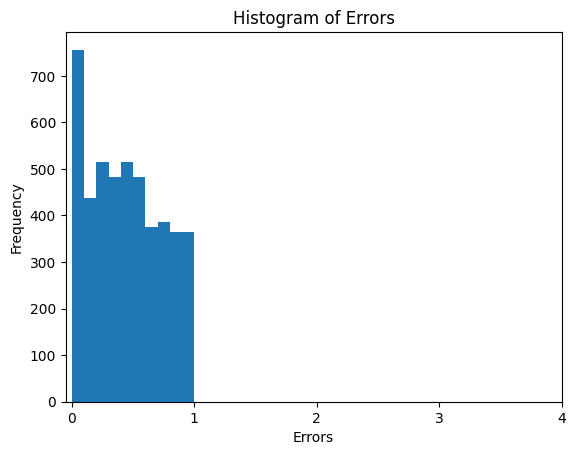

In [ ]:
import matplotlib.pyplot as plt


plt.hist(census_tracts['relative_error'])

# Add labels and a title
plt.xticks(np.arange(0, 5))
plt.xlabel('Errors')
plt.ylabel('Frequency')
plt.title('Histogram of Errors')
plt.savefig('overlapping.png')

# Show the plot
plt.show()

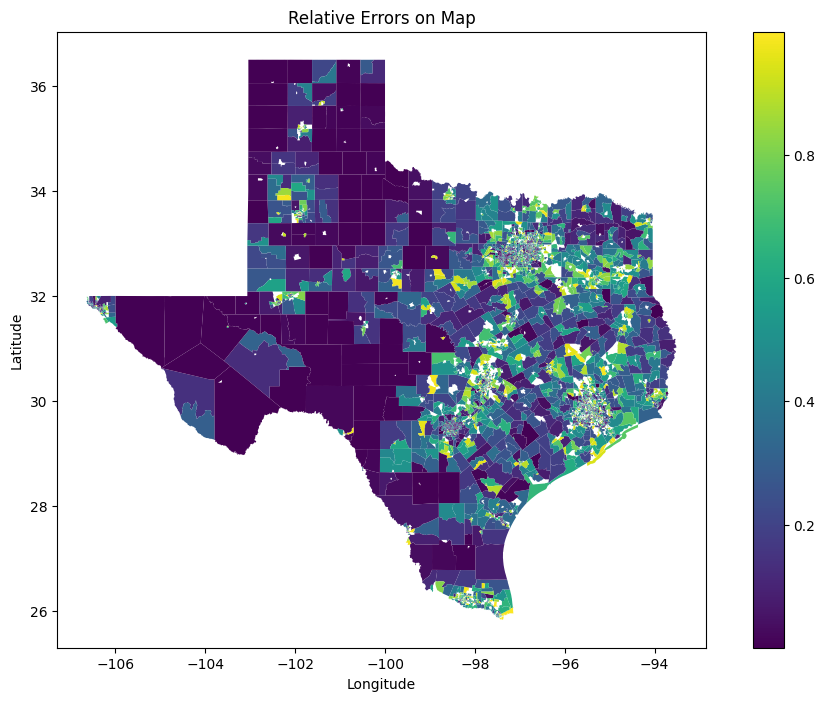

In [ ]:
# Create a base map using census_blocks
base_map = census_tracts.plot(column='relative_error',  legend=True, figsize=(12, 8))

# Customize the plot (add title, labels, etc.)

plt.title('Relative Errors on Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.savefig('overlapping_map.png')
# Show the plot
plt.show()

In [ ]:
results = pd.DataFrame(columns=['County', 'CensusBlock', 'Precinct'])

for i in census_tracts.index:
    census_block_tract_id = census_tracts.loc[i, 'NAMELSAD']
    census_block_polygon = census_tracts.loc[i, 'geometry']
    overlap_precincts = precincts[precincts['geometry'].intersects(census_block_polygon)]
    overlap_precincts['overlap_percentage'] = None
    for idx, precinct_row in overlap_precincts.iterrows():
        precinct_geometry = precinct_row['geometry']

        # Calculate the intersection area
        intersection_area = precinct_geometry.intersection(census_block_polygon).area

        # Calculate the percentage overlap
        overlap_percentage = (intersection_area / precinct_geometry.area) * 100

        # Assign the calculated overlap_percentage to the corresponding row
        overlap_precincts.loc[idx, 'overlap_percentage'] = overlap_percentage

    # Filter the precincts for overlap_percentage >= 50
        filtered_precincts = overlap_precincts[overlap_precincts['overlap_percentage'] >= 50]

    # Extract the 'PRECINCT' values from the filtered precincts
        precincts_list = filtered_precincts['PREC'].tolist()
        county_list = filtered_precincts['CNTY'].tolist()

    # Append a row to the results DataFrame
        for county,precinct in zip(county_list,precincts_list):
            results = results.append({'County': county,  'CensusBlock': census_block_tract_id, 'Precinct': precinct}, ignore_index=True)

Streaming output truncated to the last 5000 lines.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
<ipython-input-31-af92a35b4a30>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'County': county,  'CensusBlock': census_block_tract_id, 'Precinct': precinct}, ignore_index=True)
<ipython-input-31-af92a35b4a30>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'County': county,  'CensusBlock': census_block_tract_id, 'Precinct': precinct}, ignore_index=True)
<ipython-input-31-af92a35b4a30>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a f

In [ ]:
results

,County,CensusBlock,Precinct
0,189,Census Tract 9502,0203
1,189,Census Tract 9502,0203
2,189,Census Tract 9502,0206
3,189,Census Tract 9502,0203
4,189,Census Tract 9502,0206
...,...,...,...
36002,441,Census Tract 127.02,0305
36003,167,Census Tract 7205.01,0464
36004,167,Census Tract 7205.01,0464
36005,167,Census Tract 7205.01,0464


In [ ]:
results['County'] = results['County'].astype(str)

In [ ]:
results['Geographic Area Name'] = results['CensusBlock'] + ',' + results['County'] + ',texas'


In [ ]:
result_df = pd.merge(results, precincts, left_on='Precinct', right_on='PREC')
result_df.head()
result1 = result_df[['Geographic Area Name', 'Precinct', 'Biden_proportion']]
result1

,Geographic Area Name,Precinct,Biden_proportion
0,"Census Tract 9502,189,texas",0203,0.590233
1,"Census Tract 9502,189,texas",0203,0.026786
2,"Census Tract 9502,189,texas",0203,0.766129
3,"Census Tract 9502,189,texas",0203,0.080402
4,"Census Tract 9502,189,texas",0203,0.189091
...,...,...,...
1222354,"Census Tract 9501.01,21,texas",4019,0.693260
1222355,"Census Tract 9501.01,21,texas",4019,0.836851
1222356,"Census Tract 9501.01,21,texas",4019,0.247368
1222357,"Census Tract 9501.01,21,texas",4019,0.448732


In [ ]:
result = results.groupby('Geographic Area Name')['Precinct'].unique().reset_index()


result

,Geographic Area Name,Precinct
0,"Census Tract 1,113,texas",[1050]
1,"Census Tract 1,135,texas",[0108]
2,"Census Tract 1,177,texas","[0009, 0008]"
3,"Census Tract 1,285,texas","[0031, 0002, 0027, 0019, 0007, 0020]"
4,"Census Tract 1,287,texas","[0302, 0405, 0301, 0303]"
...,...,...
3832,"Census Tract 9803,201,texas",[0361]
3833,"Census Tract 9803,245,texas",[0107]
3834,"Census Tract 99,113,texas","[2000, 2076, 2309, 4001, 4000]"
3835,"Census Tract 9900,167,texas","[0218, 0315, 0306, 1051, 0224]"


In [ ]:
# Function to calculate average of a list
def calculate_average(lst):
    return sum(lst) / len(lst) if len(lst) > 0 else 0

In [ ]:
result2 = result1.groupby('Geographic Area Name')['Biden_proportion'].unique().reset_index()


result2

,Geographic Area Name,Biden_proportion
0,"Census Tract 1,113,texas","[0.6834170854271356, 0.5909090909090909, 0.442..."
1,"Census Tract 1,135,texas","[0.15546558704453442, 0.3688172043010753, 0.25..."
2,"Census Tract 1,177,texas","[0.11586638830897704, 0.12643678160919541, 0.3..."
3,"Census Tract 1,285,texas","[0.4269230769230769, 0.12295514511873351, 0.74..."
4,"Census Tract 1,287,texas","[0.703076923076923, 0.0945945945945946, 0.1618..."
...,...,...
3832,"Census Tract 9803,201,texas","[0.6303258145363408, 0.9237435008665511, 0.583..."
3833,"Census Tract 9803,245,texas","[0.2762271414821944, 0.2658959537572254, 0.135..."
3834,"Census Tract 99,113,texas","[0.7864864864864864, 0.7078327727054301, 0.256..."
3835,"Census Tract 9900,167,texas","[0.42857142857142855, 0.669971671388102, 0.405..."


In [ ]:
import numpy as np


In [ ]:
result2['average_Biden_proportion'] = result2['Biden_proportion'].apply(calculate_average)

# Calculate average excluding NaN values
avg = result2['average_Biden_proportion'][~np.isnan(result2['average_Biden_proportion'])].mean()

result2['average_Biden_proportion'] = result2['average_Biden_proportion'].fillna(0)

avg = result2['average_Biden_proportion'].mean()



result2

,Geographic Area Name,Biden_proportion,average_Biden_proportion
0,"Census Tract 1,113,texas","[0.6834170854271356, 0.5909090909090909, 0.442...",0.572237
1,"Census Tract 1,135,texas","[0.15546558704453442, 0.3688172043010753, 0.25...",0.343012
2,"Census Tract 1,177,texas","[0.11586638830897704, 0.12643678160919541, 0.3...",0.255372
3,"Census Tract 1,285,texas","[0.4269230769230769, 0.12295514511873351, 0.74...",0.299422
4,"Census Tract 1,287,texas","[0.703076923076923, 0.0945945945945946, 0.1618...",0.254841
...,...,...,...
3832,"Census Tract 9803,201,texas","[0.6303258145363408, 0.9237435008665511, 0.583...",0.712420
3833,"Census Tract 9803,245,texas","[0.2762271414821944, 0.2658959537572254, 0.135...",0.331908
3834,"Census Tract 99,113,texas","[0.7864864864864864, 0.7078327727054301, 0.256...",0.544887
3835,"Census Tract 9900,167,texas","[0.42857142857142855, 0.669971671388102, 0.405...",0.450635


In [ ]:
csv_file_path = 'overlapping_matching.csv'

# Use the to_csv method to save the DataFrame as a CSV file
results.to_csv(csv_file_path, index= True)
print(f"DataFrame has been saved to {csv_file_path}")

DataFrame has been saved to overlapping_matching.csv


In [ ]:
csv_file_path = 'overlapping_matching2.csv'

# Use the to_csv method to save the DataFrame as a CSV file
result.to_csv(csv_file_path, index= True)
print(f"DataFrame has been saved to {csv_file_path}")

DataFrame has been saved to overlapping_matching2.csv


In [ ]:
csv_file_path = 'overlapping_matching_avg_biden.csv'

# Use the to_csv method to save the DataFrame as a CSV file
result2.to_csv(csv_file_path, index= True)
print(f"DataFrame has been saved to {csv_file_path}")

DataFrame has been saved to overlapping_matching_avg_biden.csv
